## Discussion #5

Files needed = `gdp_components.csv`, `cars.dta`

OH: Mondays and Wednesdays 9:15-10:15am in 6473 Sewell Social Sciences

Email: minnie.cui@wisc.edu

A couple of notes...

1. Exam next week Wednesday (March 6)
2. No discussion next week

### This week we saw:
- Visualization
- `matplotlib`
- `seaborn` (intro)

### We'll also cover:
- File paths
- Terminal commands

## Visualization

Visualization is one of our most powerful tools for describing data. It's much easier to see trends and correlations in a graph rather than a table. [Edward Tufte](https://www.edwardtufte.com/tufte/books_vdqi) has some amazing references on what makes a good visualization. We want to convey complex ideas clearly and efficiently. You should know your:
- Message: What are you trying to show?
- Audience: Are you writing for an informed audience? Does everyone know the background?
- Medium: Will you publish online, on paper, or in a magazine?

There are many types of plots that we can generate:
- Line, scatter, and bar plots
- Histograms
- Maps

Each conveys different information which we want to optimize for our message, audience, and medium. 

Today, we'll also review regplots and bubble plots.

In [2]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt   

# Load plots in the notebook rather than a new window
%matplotlib inline  

# Read in data (notice the directory!)
gdp = pd.read_csv('./data/subfolder/gdp_components.csv', index_col=0)

# Rename columns
old_names = gdp.columns
new_names = ['gdp', 'inv', 'gov', 'ex', 'im']
names = dict(zip(old_names, new_names))
gdp.rename(columns=names, inplace=True)

# Check out the first few
gdp.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/subfolder/gdp_components.csv'

In [3]:
# Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt   

# Load plots in the notebook rather than a new window
%matplotlib inline  

# Read in data (notice the directory!)
gdp = pd.read_csv('gdp_components.csv', index_col=0)
print(gdp)



# Rename columns
old_names = gdp.columns
new_names = ['gdp', 'inv', 'gov', 'ex', 'im']
names = dict(zip(old_names, new_names))
gdp.rename(columns=names, inplace=True)

# Check out the first few
gdp.head()

           GDPA     GPDIA      GCEA    EXPGSA    IMPGSA
DATE                                                   
1929    104.556    17.170     9.622     5.939     5.556
1930     92.160    11.428    10.273     4.444     4.121
1931     77.391     6.549    10.169     2.906     2.905
1932     59.522     1.819     8.946     1.975     1.932
1933     57.154     2.276     8.875     1.987     1.929
...         ...       ...       ...       ...       ...
2013  16784.851  2826.013  3132.409  2273.428  2764.210
2014  17521.747  3038.931  3167.041  2371.027  2879.284
2015  18219.297  3211.971  3234.210  2265.047  2786.461
2016  18707.189  3169.887  3290.979  2217.576  2738.146
2017  19485.394  3367.965  3374.444  2350.175  2928.596

[89 rows x 5 columns]


,gdp,inv,gov,ex,im
DATE,,,,,
1929,104.556,17.170,9.622,5.939,5.556
1930,92.160,11.428,10.273,4.444,4.121
1931,77.391,6.549,10.169,2.906,2.905
1932,59.522,1.819,8.946,1.975,1.932
1933,57.154,2.276,8.875,1.987,1.929


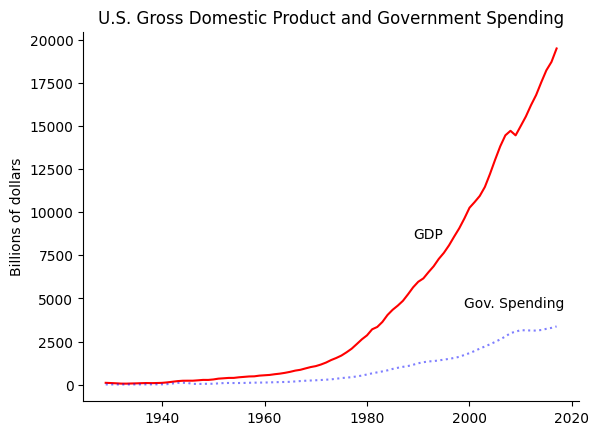

In [2]:
# Create a blank plot and insert GDP
fig, ax = plt.subplots()
ax.plot(gdp.index, gdp['gdp'], color='red', label = 'GDP')  

# Add government spending
ax.plot(gdp.index, gdp['gov'], color='blue', alpha = 0.5, linestyle = ':', label = 'Gov. Spending')  

# Add labels
ax.set_ylabel('Billions of dollars')  
ax.set_title('U.S. Gross Domestic Product and Government Spending')

# Remove the top and right lines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)  

# Put text on the figure. 
ax.text(1989, 8500, 'GDP')           
ax.text(1999, 4500, 'Gov. Spending') 

# Create a pdf and save to cwd 
# plt.savefig('gdp.pdf', bbox_inches='tight')        

# Create a png and save to the folder that contains the cwd
# plt.savefig('../gdp.png')                          

# Show plot
plt.show()

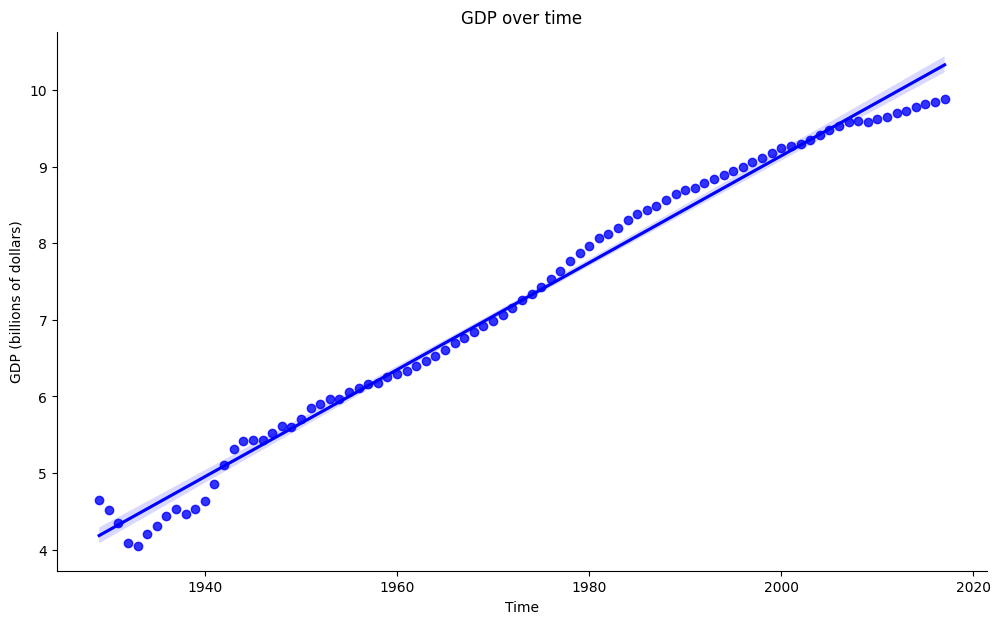

In [3]:
# Can we make a plot of GDP with a regression line? What's a better approach? Hint: log(y)
# Hint: regplot in seaborn with ci option

fig, ax = plt.subplots(figsize=(12,7))
gdp.reset_index(inplace=True)
gdp['log_gdp'] = np.log(gdp['gdp'])

sns.regplot(x='DATE', 
            y='log_gdp', 
            data=gdp,                                           # the data
            ax = ax,                                            # an axis object
            color = 'blue',                                     # make it blue
            ci = 95                                             # confidence interval: pass it the percent
            )                                          

sns.despine(ax = ax)                  

ax.set_title('GDP over time')
ax.set_ylabel('GDP (billions of dollars)')
ax.set_xlabel('Time')

plt.show()

## Some (more) skills you'll need as you write your project proposals...

When putting your proposals together with your project teams, keep in mind a few things to make your work look clear and professional. Note: In Jupyter notebooks, we can also read in Stata data (.dta format). Let's see an example below.

### Saving and embedding high-res images in reports

After creating beautiful figures, you can output them from your notebook to your local drives. Then, you can upload them in to Word or embed them in Latex to show some evidence for your working hypotheses. 

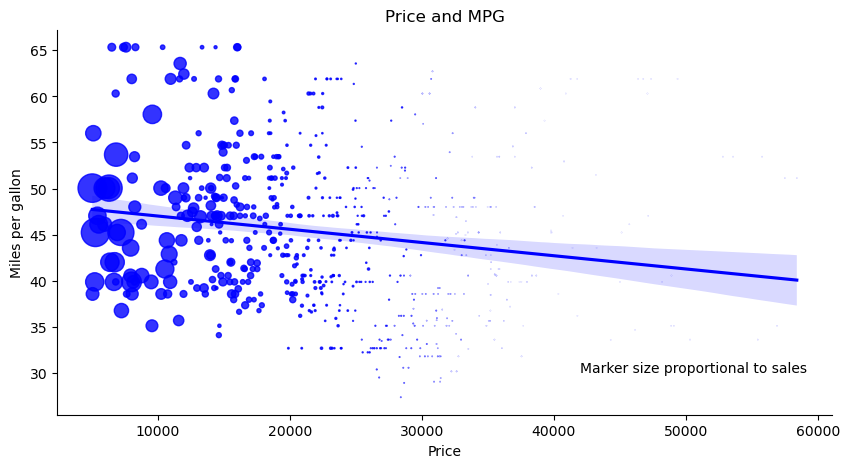

In [4]:
# Load data 
cars = pd.read_stata('cars.dta')

# Select firms
firms = ['Ford', 'PSA', 'Volkswagen', 'Fiat']
cars = cars[cars['FIRM'].isin(firms)]

# Let's make a bubble plot!
fig, ax = plt.subplots(figsize=(10,5)) 

sns.regplot(x='PRICE', y='MPG', data=cars,             # the data
            ax = ax,                                   # an axis object
            scatter_kws={'s': cars['SALES']/10000000}, # make the marker proportional to sales          
            color = 'blue',                            # make it blue
            ci = 95,                                   # confidence interval: pass it the percent
            logx = False)                              
                      
# We need to let the reader know what the bubble sizes represent.
ax.text(42000, 30, 'Marker size proportional to sales')

sns.despine(ax = ax)  
                                   

ax.set_title('Price and MPG')
ax.set_ylabel('Miles per gallon')
ax.set_xlabel('Price')
#plt.show()
plt.savefig('bubble.png', bbox_inches='tight')

# What can we learn from this plot? 

# There doesn't seem to be a strong relationship between how expensive a car is and its MPG! 
# Unsurprisingly, people tend to buy the cheaper cars far more than the more expensive cars.

## File Paths and Terminal

File paths are very important for accessing the right files. If we aren't organized and don't specify where a particular dataset is, Python won't know where to find it and will throw an error. There are *absolute paths* and *relative paths*. In absolute paths, we specify every level of the directory structure. In relative paths, we are working relative to our current working directory.
- U:/Documents/friday5
- ./friday5
- ../friday5

Which one is which? Is one better than the other? What does the third one do? Be careful with backslashes... sometimes you need `..\\friday5` depending on your operating system. Also check out `os.listdir()`, `os.chdir('new_path')`, and `os.getcwd()`.

In terminal (command prompt), these are equivalent to `ls` and `cd`. We can also make new directories with `mkdir new_folder`. Be extremely careful when using terminal! Especially with `sudo` and `rm` - you can [accidentally delete everything, including terminal itself](https://www.ee.ryerson.ca/~elf/hack/recovery.html).

In [5]:
# Import and get cwd
import os
print(os.getcwd())
print(os.listdir())
os.chdir("data")
print(os.getcwd())

# Change back to main folder
os.chdir("..") 

/Users/minniecui/Dropbox/Econ570_sp2024/99-Fridays/friday5
['.DS_Store', 'bubble.png', 'cars.dta', 'friday5_s24.ipynb', 'friday5_s24_soln.ipynb', '.ipynb_checkpoints', 'data']
/Users/minniecui/Dropbox/Econ570_sp2024/99-Fridays/friday5/data


## Exam Advice

- Organize all of your files before the exam
    - Lecture, discussion, practice exam, and coding practice notebooks
    - This will make it easy to refer to methods
- Easy access to documentation
    - Python documentation is [here](https://docs.python.org/3.9/)
    - `pandas` documentation is [here](https://pandas.pydata.org/docs/)
- Write a study guide
    - You could make a Jupyter notebook with useful functions, methods, and examples
    - This'll make your life easier during the exam
- *Do **not** work together on the exam*

## Have a great weekend!